# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Is the distribution of body temperatures normal?

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

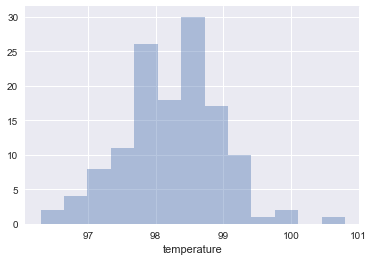

In [4]:
sns.distplot(df['temperature'],kde=False)

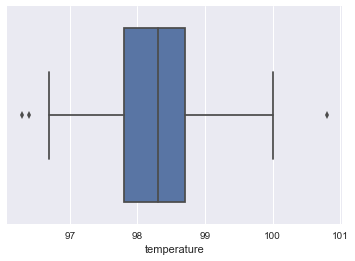

In [5]:
sns.boxplot(x='temperature',data=df)

The data looks fairly symmertric. To confirm this, lets construct a normal probability plot

In [6]:
from scipy import stats

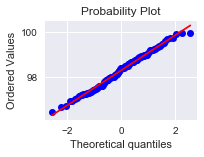

In [7]:
ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=df['temperature'].mean(), scale=df['temperature'].std(), size=len(df))
res = stats.probplot(x, plot=plt)

the temperature appears normal

# Is the true population mean really 98.6 degrees F?

lets calculate the mean

In [8]:
mean=df['temperature'].mean()
mean

98.24923076923078

In [9]:
std=df['temperature'].std()
std

0.7331831580389454

In [10]:
n=len(df['temperature'])
n

130

In [11]:
SE = std / n ** 0.5

In [12]:
SE

0.06430441683789101

Lets use Z test since n>100
H0= Null hypothesis=98.6
Ha= alternate hypothesis !=98.6


In [13]:
z=(mean-98.6)/SE
z

-5.454823292364079

Lets calcualate p value now on 2 tail test

In [14]:
p = stats.norm.sf(abs(z))*2
p

4.9021570141133797e-08

since p is much less than signiface value(0.05), we can reject H0 that the mean temperature is 98.6 deg. F.

# At what temperature should we consider someone's temperature to be "abnormal"?

lets compute the margin of error and 95% confidence interval for the sample distribution.

In [15]:
ME=1.96*SE
ME

0.12603665700226638

In [16]:
CI=mean-ME,mean+ME
CI

(98.12319411222852, 98.37526742623304)

We can be 95% certain that the mean body temperature should be between 98.1 and 98.4 degrees F. Mean temperatures outside this range would be considered abnormal.

Is there a significant difference between males and females in normal temperature?

Use a two-sample hypothesis test to determine if a statistically-significant different in normal temperatures occurs between males and females:
H0 (null) = mean_males - mean_females == 0
HA (alternative) = mean_males - mean_females != 0
Since the direction of the difference is unimportant, use a two-sided hypothesis test.

In [17]:
meanMale=df[df.gender=='M'].temperature.mean()
varMale=df[df.gender=='M'].temperature.var()
meanFemale=df[df.gender=='F'].temperature.mean()
varFemale=df[df.gender=='F'].temperature.var()
SE=((varMale/len(df[df.gender=='M'])+varFemale/len(df[df.gender=='F'])))**0.5

In [18]:
zScore=(meanMale-meanFemale)/SE# using z score because sample size > 30
p_value = stats.norm.sf(abs(zScore))*2# using two-sided test
p_value

0.02228736076067726

since p value is less than .05, we can reject null hypothesis